
**Materia:** MACHINE LEARNING II

**Especialización en Analítica y Ciencia de Datos**

**Facultad de Ingeniería - Universidad de Antioquia**

**Diego Alejandro Salazar Blandón**

  ID: 15'373.359

**Daniel Restrepo Alvarez**

  ID: 8'175.343

##1 Research about the Spectral Clustering method, and answer the following questions:


**a. In which cases might it be more useful to apply?**





 some cases where spectral clustering might be more useful:

1. Non-convex clusters: Spectral clustering can effectively cluster data with non-convex or irregularly shaped clusters, unlike some other clustering methods like k-means, which assumes convex clusters.

2. Graph-based data: Spectral clustering is often applied to data represented as graphs or networks. It leverages the graph Laplacian to discover communities within the graph. Examples include social network analysis, image segmentation, and recommendation systems.

3. Dimensionality reduction: Spectral clustering can be used for dimensionality reduction by selecting a few top eigenvectors of the Laplacian matrix. This can help in visualizing high-dimensional data and preserving essential structural information.

4. Unequal cluster sizes: When clusters have significantly different sizes, traditional methods like k-means may struggle. Spectral clustering can handle unevenly sized clusters by examining the connectivity of data points in the affinity matrix.

5. Data with complex relationships: Spectral clustering can uncover hidden structures in data with intricate relationships, making it suitable for applications like gene expression analysis, where data points may not conform to simple geometric shapes.

6. Image segmentation: Spectral clustering has been used successfully in image segmentation tasks, where it can group pixels into coherent regions based on their similarities. This is especially useful in medical imaging and computer vision applications.
7. Clustering high-dimensional data: When dealing with high-dimensional data, traditional clustering methods can suffer from the "curse of dimensionality." Spectral clustering often performs better in high-dimensional spaces by capturing the underlying manifold structure.

8. Noisy data: Spectral clustering can be robust to noise because it primarily relies on pairwise similarities between data points rather than explicit distance metrics. This makes it suitable for datasets with noisy or corrupted observations.

9. Customized affinity measures: Spectral clustering allows you to define custom similarity or affinity measures based on domain-specific knowledge, which can improve clustering performance when standard distance metrics are inadequate.

10. Community detection in networks: Spectral clustering is commonly used for community detection in complex networks, such as social networks, citation networks, and biological networks, where the goal is to identify cohesive groups of nodes.



**b. What are the mathematical fundamentals of it?**



The mathematical fundamentals of spectral clustering involve linear algebra concepts, graph theory, and some basic knowledge of clustering algorithms. Spectral clustering is powerful because it can discover complex cluster structures, including non-convex shapes, and it doesn't rely on assumptions about the shapes or sizes of the clusters in the data.

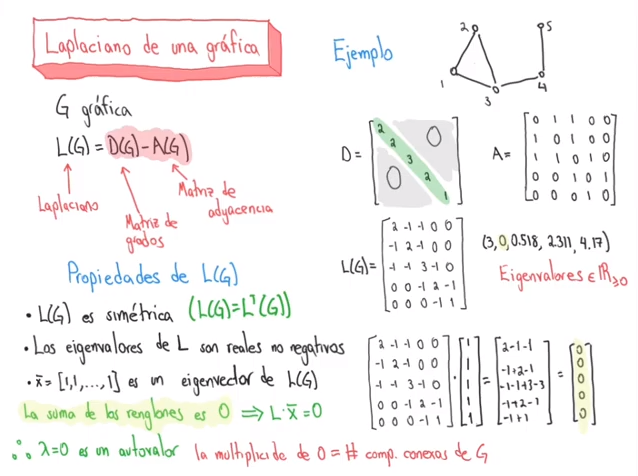

Data Representation: Suppose you have a dataset with N data points. You first need to represent this data as a similarity or affinity matrix, typically denoted as **W** where $W_{ij}$ represents the similarity or affinity between data points
$i$ and $j$. Common choices for similarity measures include Gaussian affinity (based on Euclidean distance), k-nearest neighbors, or other similarity metrics.

Graph Representation: The similarity matrix **W** is often used to construct a weighted graph. Each data point corresponds to a node in the graph, and the weights $W_{ij}$ represent the strength of the connection between nodes
$i$ and $j$.

Laplacian Matrix: One of the key concepts in spectral clustering is the Laplacian matrix, denoted as **L**

Eigenvalue Decomposition: The next step is to compute the eigenvectors and eigenvalues of the Laplacian matrix
**L**. Let's say you compute
$k$ eigenvectors corresponding to the
$k$ smallest eigenvalues. These eigenvectors are often referred to as the spectral embedding of the data.

Clustering: Once you have obtained the spectral embedding, you can use traditional clustering algorithms like k-means on the rows of the embedding matrix to partition the data into clusters. Alternatively, you can use other spectral clustering techniques that involve the eigenvectors to cluster the data directly.

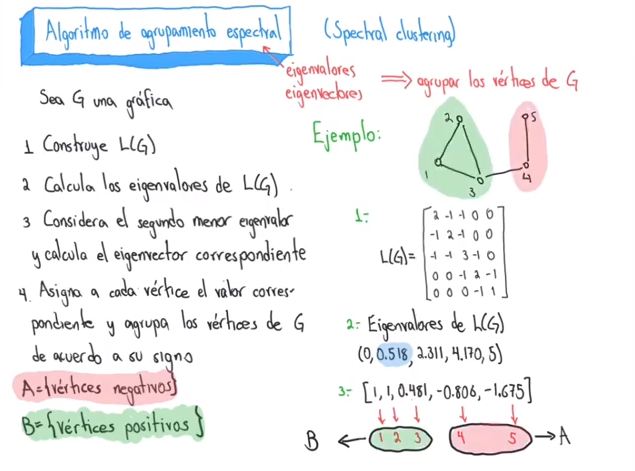

**c. What is the algorithm to compute it?**



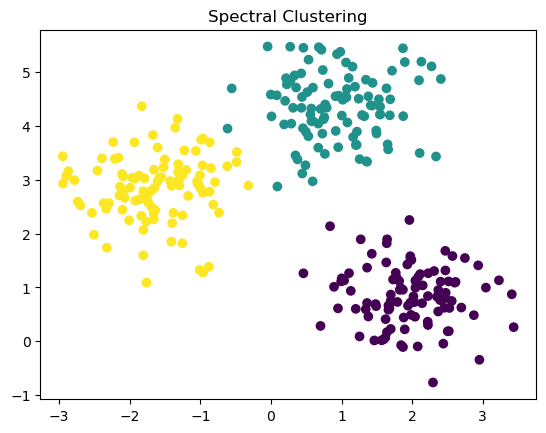

In [1]:
import numpy as np
from scipy.linalg import eigh
import warnings

warnings.filterwarnings('ignore')

# Step 1: Build the affinity matrix (similarity)
def affinity_matrix(X, sigma=1.0):
    n = X.shape[0]
    W = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            d = np.linalg.norm(X[i] - X[j])  # Euclidean distance between points
            W[i, j] = np.exp(-d / (2 * sigma**2))
            W[j, i] = W[i, j]

    return W

# Step 2: Build the Laplacian matrix
def laplacian_matrix(W):
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    return L

# Step 3: Calculate the eigenvectors and eigenvalues of the Laplacian matrix
def compute_eigenvectors(L, k):
    eigenvalues, eigenvectors = eigh(L, eigvals=(0, k-1))
    return eigenvectors

# Step 4: Perform k-means on the normalized eigenvectors
from sklearn.cluster import KMeans

def spectral_clustering(X, k, sigma=1.0):
    # Step 1: Build the affinity matrix
    W = affinity_matrix(X, sigma)

    # Step 2: Build the Laplacian matrix
    L = laplacian_matrix(W)

    # Step 3: Calculate the eigenvectors
    eigenvectors = compute_eigenvectors(L, k)

    # Step 4: Apply k-means on the normalized eigenvectors
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(eigenvectors)
    labels = kmeans.labels_

    return labels

# Example of usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    # Generate synthetic data for clustering
    X, _ = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.6)

    # Perform Spectral Clustering
    k = 3
    labels = spectral_clustering(X, k)

    # Visualize the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Spectral Clustering')
    plt.show()

**d. Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?**


Spectral clustering is related to PCA in that both use spectral or eigenvalue decomposition as the basis of their algorithm for dimensionality reduction.

#2 Research about the DBSCAN method, and answer the following questions:
**a. In which cases might it be more useful to apply?**



some cases where DBSCAN might be more useful:

1. **Arbitrary-shaped clusters:** DBSCAN is effective at identifying clusters of arbitrary shapes. Unlike k-means, which assumes spherical clusters, DBSCAN can discover clusters of various shapes, including irregular and elongated ones.

2. **Variable cluster density:** DBSCAN can handle clusters with varying densities. It doesn't require clusters to have a uniform density, making it suitable for data where clusters might have different point densities.

3. **Noisy data:** DBSCAN is robust to noise points. It can differentiate between dense clusters and noisy outliers, labeling the latter as noise rather than forcing them into a cluster.

4. **Unknown number of clusters:** DBSCAN doesn't require you to specify the number of clusters in advance, which can be a significant advantage when the number of clusters is not known beforehand or when the data has varying cluster counts.

5. **Cluster detection in spatial data:** DBSCAN is often used for spatial data analysis, such as identifying geographic hotspots or clusters in data like crime incidents, earthquake epicenters, or disease outbreaks.

6. **Natural language processing (NLP):** In NLP tasks like document clustering, DBSCAN can be helpful when the number of topics or clusters is not predefined, and the data might exhibit varying topic densities.

7. **Anomaly detection:** DBSCAN can be used as an anomaly detection technique. Data points that do not belong to any cluster can be considered anomalies or outliers, making it useful for fraud detection or quality control.

8. **Large datasets:** DBSCAN can be more efficient than some other clustering algorithms for large datasets because it doesn't require a predetermined number of clusters. Its computational complexity is often linear or nearly linear, depending on the indexing structure used.

9. **Spatial data with non-uniform point density:** In geographic information systems (GIS), DBSCAN can identify clusters in spatial data with varying point densities, making it suitable for applications like identifying urban areas from GPS coordinates.

10. **Cluster merging and splitting:** DBSCAN can automatically merge or split clusters based on the density of data points, allowing it to adapt to the underlying data structure.

While DBSCAN has many advantages, it also has some limitations, such as the sensitivity to the choice of distance metric and the need to tune hyperparameters like the radius (epsilon) and the minimum number of points (MinPts). It may not perform well when clusters have significantly different densities or when clusters are embedded within each other. Therefore, it's essential to consider the characteristics of your data and your specific clustering goals when deciding whether to use DBSCAN.

**b. What are the mathematical fundamentals of it?**



In DBSCAN, a special label is assigned to each sample (point) using the
following criteria:

• A point is considered as core point if at least a specified number (MinPts) of neighboring points fall within the specified radius ε

• A border point is a point that has fewer neighbors than MinPts within ε , but lies within the ε radius of a core point

• All other points that are neither core nor border points are considered as
noise points

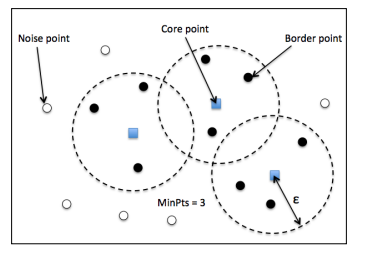

After labeling the points as core, border, or noise points, the DBSCAN algorithm can
be summarized in two simple steps:
1. Form a separate cluster for each core point or a connected group of core
points (core points are connected if they are no farther away than ε ).
2. Assign each border point to the cluster of its corresponding core point.

One of the main advantages of using DBSCAN is that it does not assume that the
clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different
from k-means and hierarchical clustering in that it doesn't necessarily assign each
point to a cluster but is capable of removing noise points.

**c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?**

DBSCAN and Spectral Clustering are distinct clustering methods, they can be used together to address different aspects of clustering tasks. DBSCAN is particularly effective for identifying dense, irregularly shaped clusters and handling noisy data, while Spectral Clustering can be valuable for further refinement or exploring the relationships within those clusters. The choice of which algorithm(s) to use depends on the specific characteristics of your data and your clustering objectives.

#3 What is the elbow method in clustering? And which flaws does it pose to assess quality

The elbow method is a common technique used to determine the optimal number of clusters in a dataset for clustering algorithms like k-means. It involves running the clustering algorithm with different numbers of clusters and then plotting a metric, such as the within-cluster sum of squares (WCSS) or distortion, against the number of clusters. The "elbow" point in the plot is the point at which the WCSS starts to level off, and it is often considered as the optimal number of clusters. This method is called the "elbow" method because the plot typically looks like an arm bent at the elbow.

Here's how the elbow method works:

1. Choose a range of candidate cluster numbers (e.g., from 1 to a maximum number of clusters you're willing to consider).

2. For each candidate cluster number, apply the clustering algorithm (e.g., k-means) and calculate a clustering quality metric (e.g., WCSS).

3. Plot the clustering quality metric against the number of clusters.

4. Look for the "elbow" point in the plot, which is the point where the metric starts to level off. This is often considered the optimal number of clusters.

However, the elbow method has some limitations and flaws:

1. **Subjectivity:** Determining the exact location of the "elbow" can be subjective and may vary depending on the choice of the clustering quality metric and the dataset. What appears to be an "elbow" in the plot might not always be clear, especially in complex or noisy data.

2. **Doesn't work well for all cluster shapes:** The elbow method assumes that clusters are spherical and equally sized, which may not hold true for all datasets. If the data has non-spherical or irregularly shaped clusters, the elbow method may not provide an accurate estimate of the optimal number of clusters.

3. **Dependent on the choice of metric:** The elbow method's effectiveness depends on the choice of clustering quality metric (e.g., WCSS or distortion). Different metrics can lead to different "elbow" points, making it challenging to select the best metric for your specific problem.

4. **Sensitive to initialization:** The choice of initial cluster centers in k-means can affect the shape of the WCSS curve. Running k-means with different initializations may produce different results.

5. **May not work for hierarchical clustering:** The elbow method is primarily designed for partition-based clustering algorithms like k-means and may not be directly applicable to hierarchical clustering methods, where clusters are organized into a tree structure.

6. **Doesn't consider external validation:** The elbow method solely relies on internal cluster quality metrics, such as WCSS, and does not take into account external validation measures that assess the quality of clustering in a real-world context.

In practice, the elbow method can be a useful heuristic for getting a rough estimate of the optimal number of clusters, especially when used in combination with other techniques and domain knowledge. However, it's essential to be aware of its limitations and consider other approaches, such as silhouette analysis, gap statistics, or expert judgment, to validate and refine the choice of the number of clusters for your specific clustering problem.

# 4 Remember the unsupervised Python package you created in the previous unit? It’s time for an upgrade.

**a. Implement the k-means module using Python and Numpy**




In [2]:
import numpy as np

class KMeans1:
    def __init__(self, n_clusters, max_iters=1000, tol=1e-5):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialize centroids randomly
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[idx]

        for i in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = self._calc_distances(X)
            self.labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.zeros((self.n_clusters, n_features))
            for j in range(self.n_clusters):
                new_centroids[j] = np.mean(X[self.labels == j], axis=0)

            # Check for convergence
            if np.sum(np.abs(new_centroids - self.centroids)) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = self._calc_distances(X)
        return np.argmin(distances, axis=1)

    def _calc_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

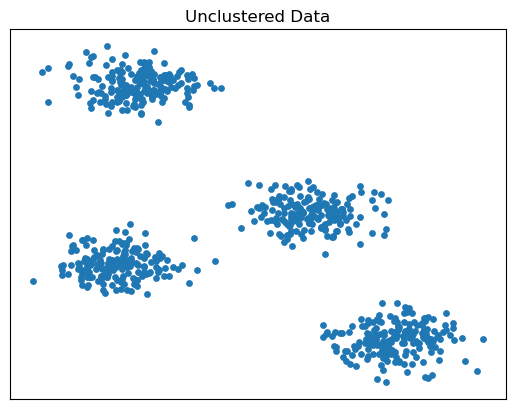

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Specifying the number of cluster our data should have
n_components = 4

X, true_labels = make_blobs(
    n_samples=750, centers=n_components, cluster_std=0.4, random_state=0
)

plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.show()

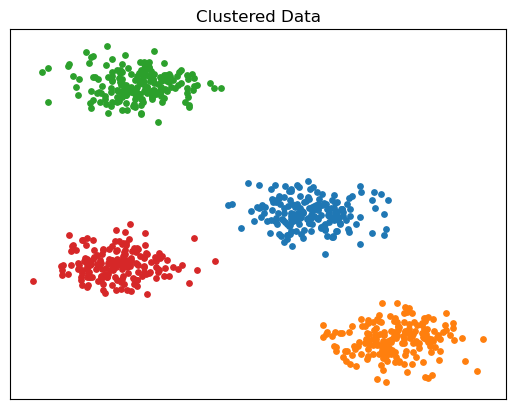

In [4]:
# Initialize KMeans
kmeans = KMeans1(n_clusters=4)

# fit the data & predict cluster labels
kmeans.fit(X)
predicted_labels = kmeans.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)


plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()

**b. Implement the k-medoids module using Python and Numpy**


In [5]:
import numpy as np

class Kmedian1:
    def __init__(self, n_clusters, max_iters=1000, tol=1e-5):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialize centroids randomly
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[idx]

        for i in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = self._calc_distances(X)
            self.labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.zeros((self.n_clusters, n_features))
            for j in range(self.n_clusters):
                new_centroids[j] = np.median(X[self.labels == j], axis=0)

            # Check for convergence
            if np.sum(np.abs(new_centroids - self.centroids)) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = self._calc_distances(X)
        return np.argmin(distances, axis=1)

    def _calc_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

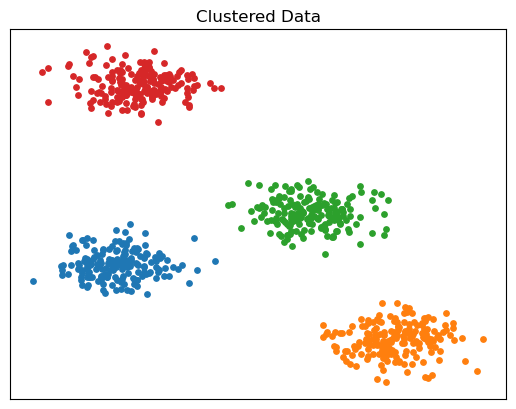

In [6]:
# Initialize KMeans
kmedian = Kmedian1(n_clusters=4)

# fit the data & predict cluster labels
kmedian.fit(X)
predicted_labels = kmedian.predict(X)


# Based on predicted_labels, we assign each data point distinct colour
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = predicted_labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], s=15)


plt.title("Clustered Data")
plt.xticks([])
plt.yticks([])
plt.show()

**c.  Remember to keep consistency with Scikit-Learn API as high as possible**

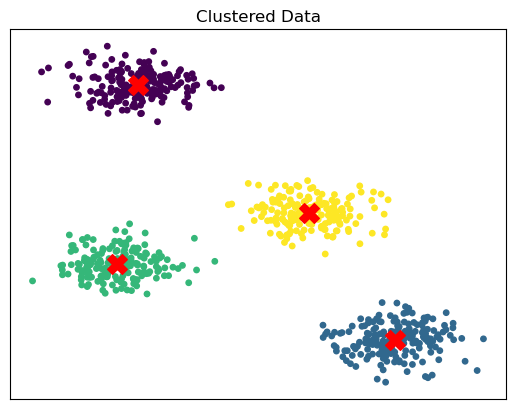

In [7]:
from sklearn.cluster import KMeans

# Especificar el número de clusters que deseas
n_clusters = 4

# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Ajustar el modelo a tus datos
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
cluster_labels = kmeans.labels_

# Mostrar los resultados
plt.title("Clustered Data")
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=15, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xticks([])
plt.yticks([])
plt.show()

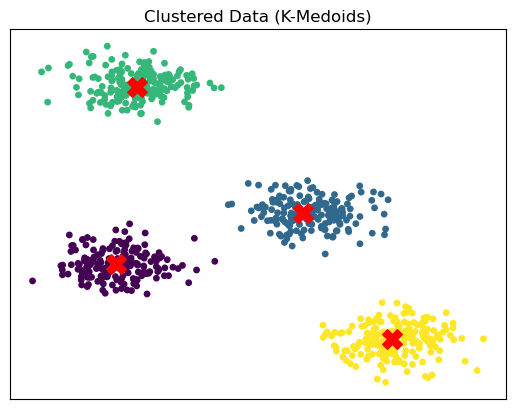

In [8]:
from sklearn_extra.cluster import KMedoids

# Especificar el número de clusters que deseas
n_clusters = 4

# Inicializar el modelo KMedoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)

# Ajustar el modelo a tus datos
kmedoids.fit(X)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
cluster_labels = kmedoids.labels_

# Mostrar los resultados
plt.title("Clustered Data (K-Medoids)")
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=15, cmap='viridis')
plt.scatter(X[kmedoids.medoid_indices_, 0], X[kmedoids.medoid_indices_, 1], s=200, c='red', marker='X')
plt.xticks([])
plt.yticks([])
plt.show()

# 5 Let’s use the newly created modules in unsupervised to cluster some toy data.
**a. Use the following code snippet to create scattered data X
from sklearn.datasets import make_blobs**



In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

**b. Plot the resulting dataset. How many clusters are there? How far are they from one another?**



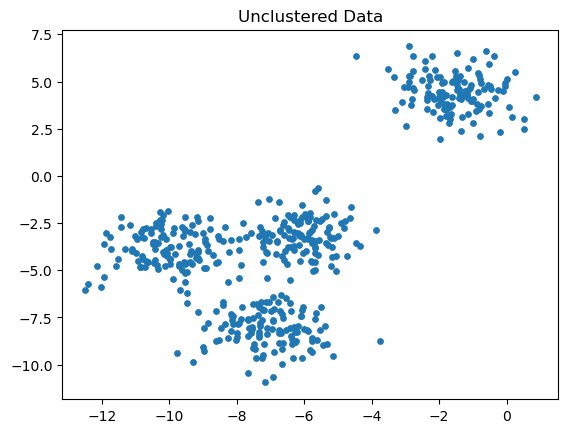

In [10]:

plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)


Visually, you can identify 2 large groups of data, where one of these groups could consist of 3 subgroups.

**c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.**



In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.555965379635587


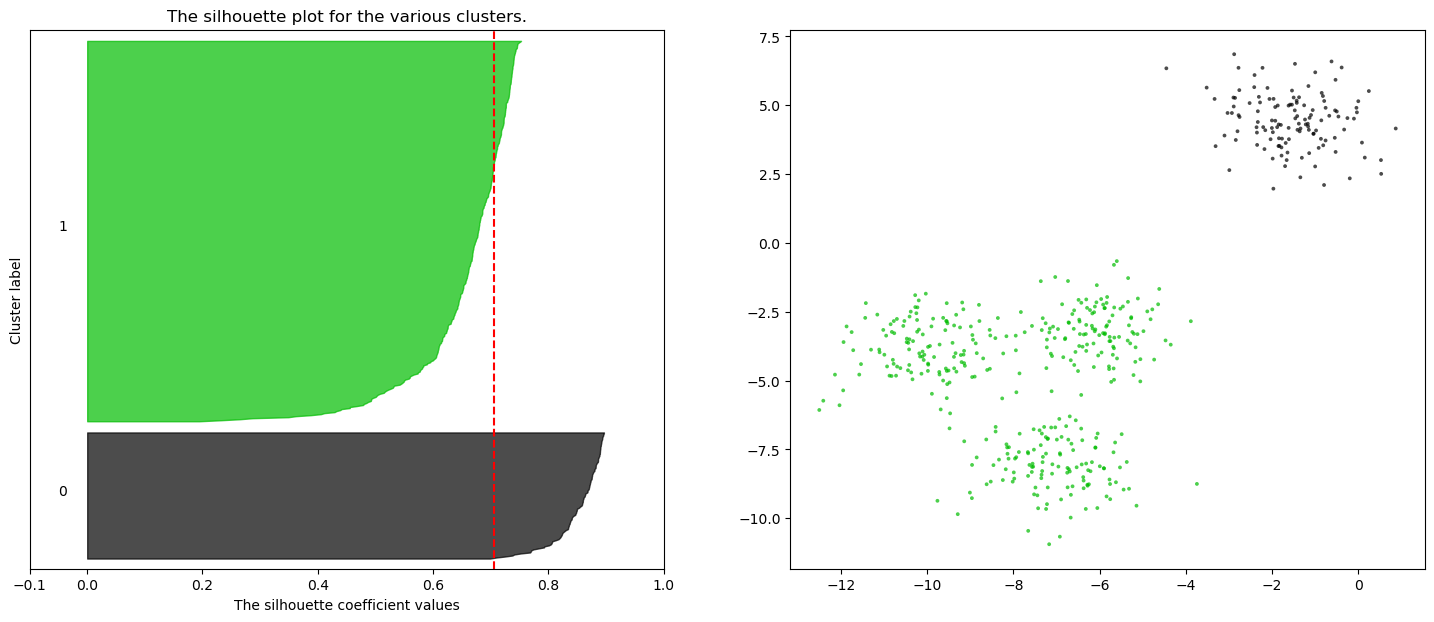

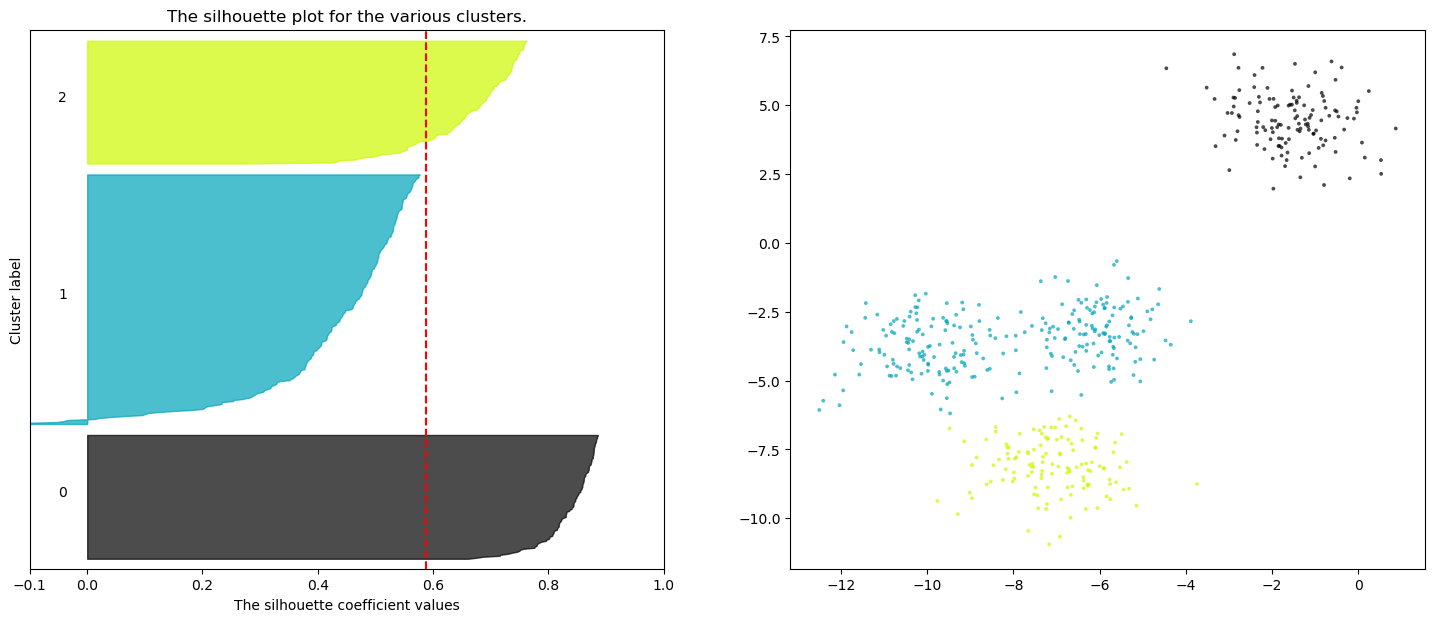

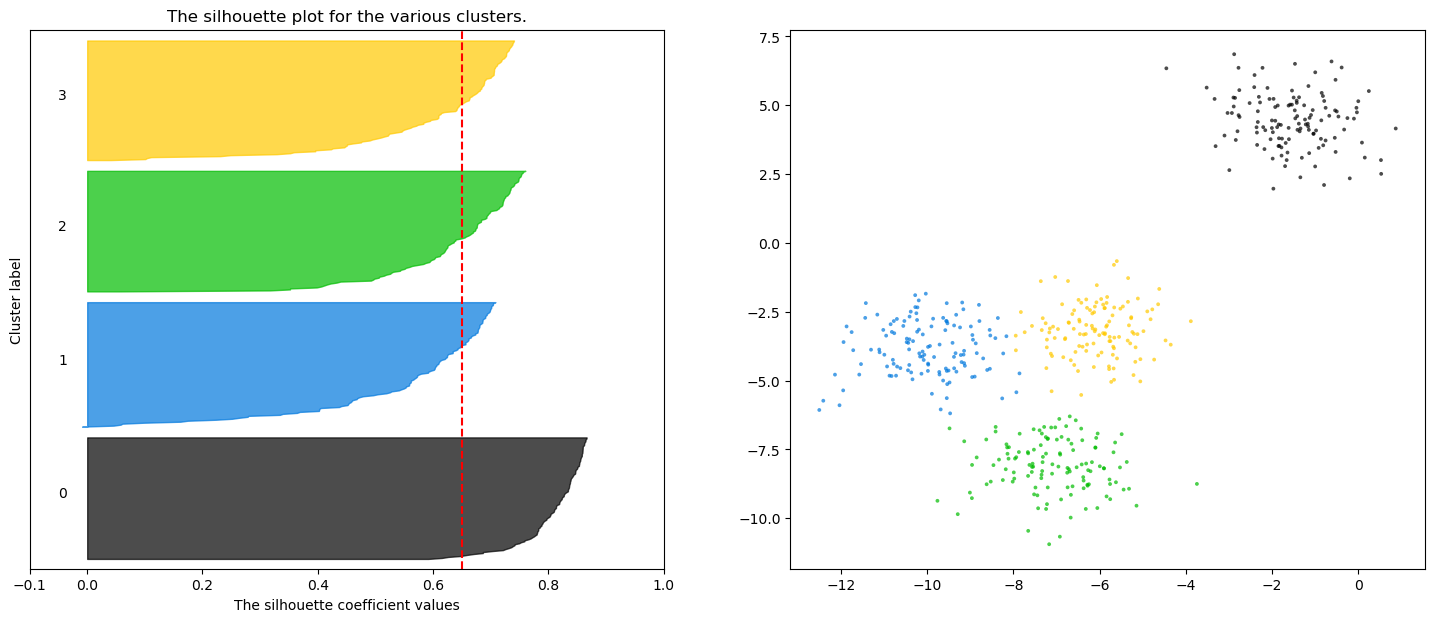

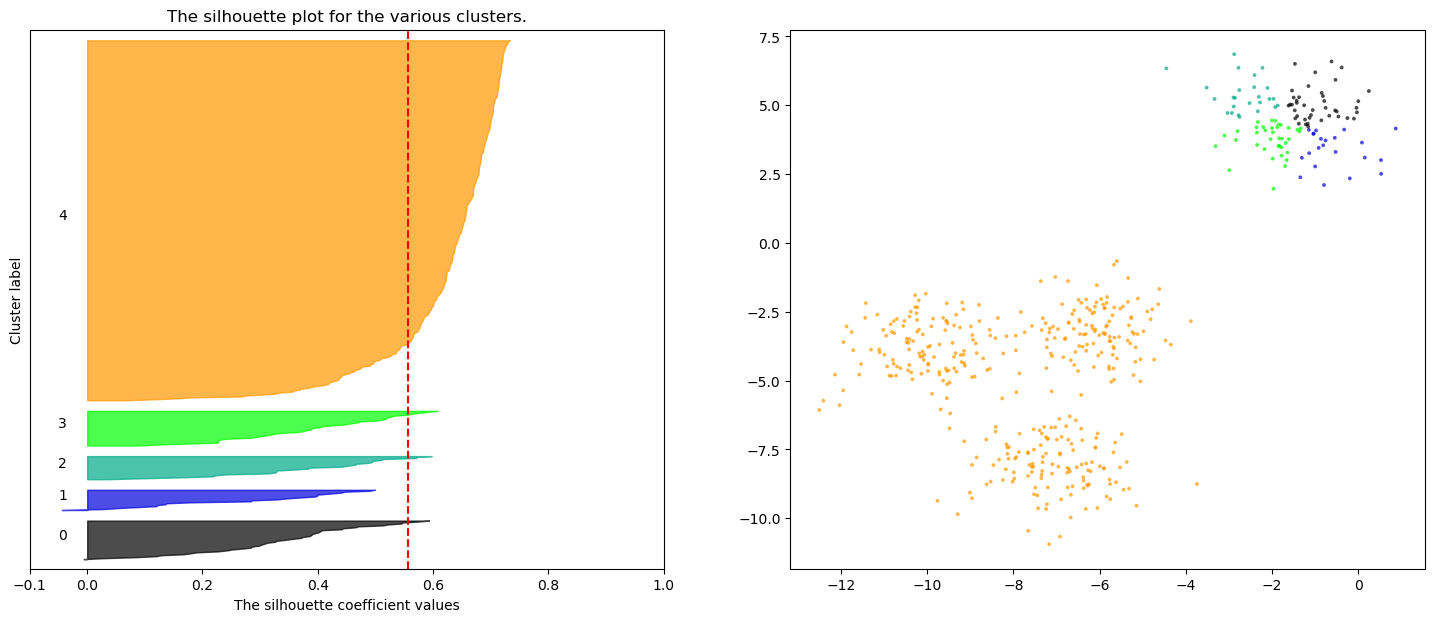

In [12]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score



range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans1(n_clusters=n_clusters)
    clusterer = kmeans.fit(X)
    cluster_labels = kmeans.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


plt.show()

##kmedoids##

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5677911795843947
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.4575354747805496


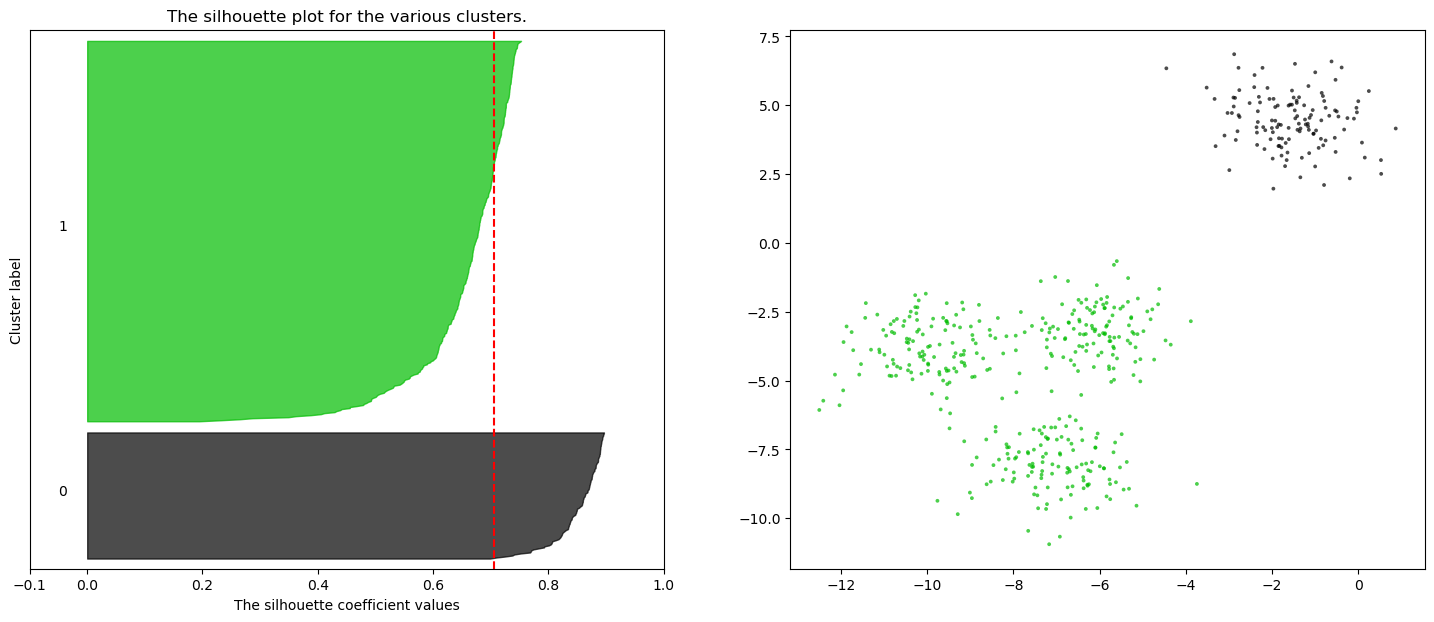

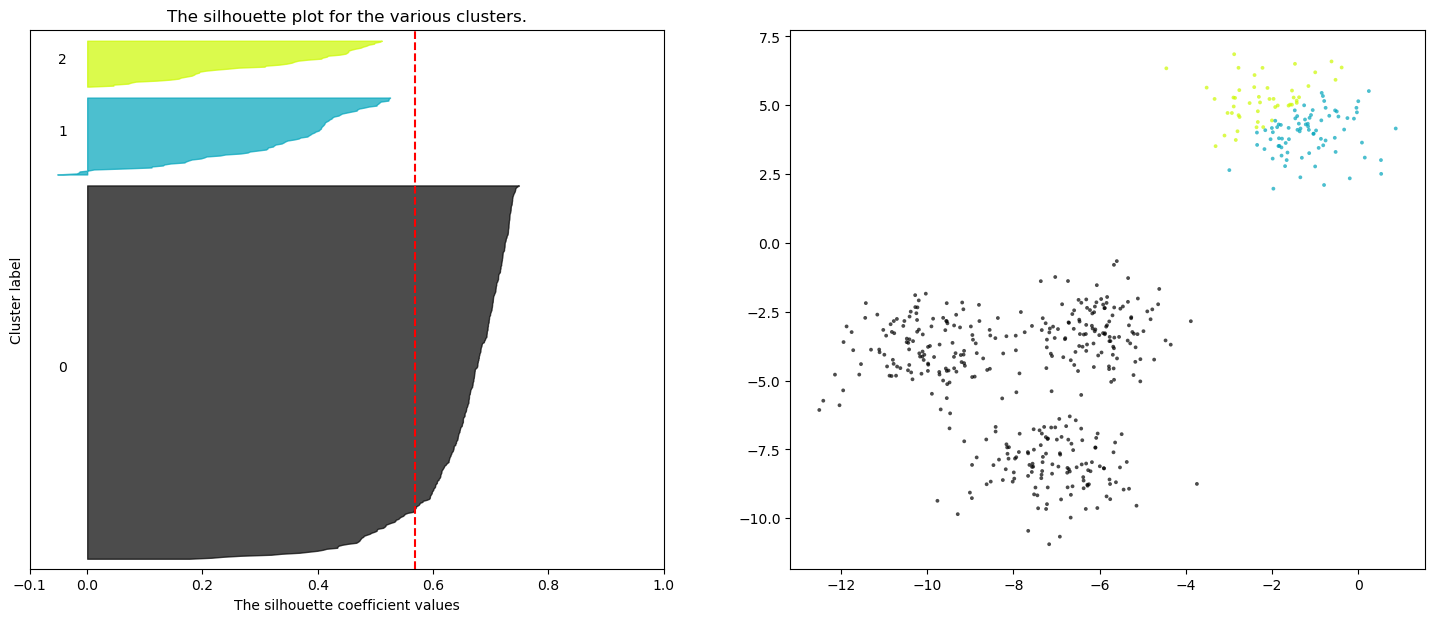

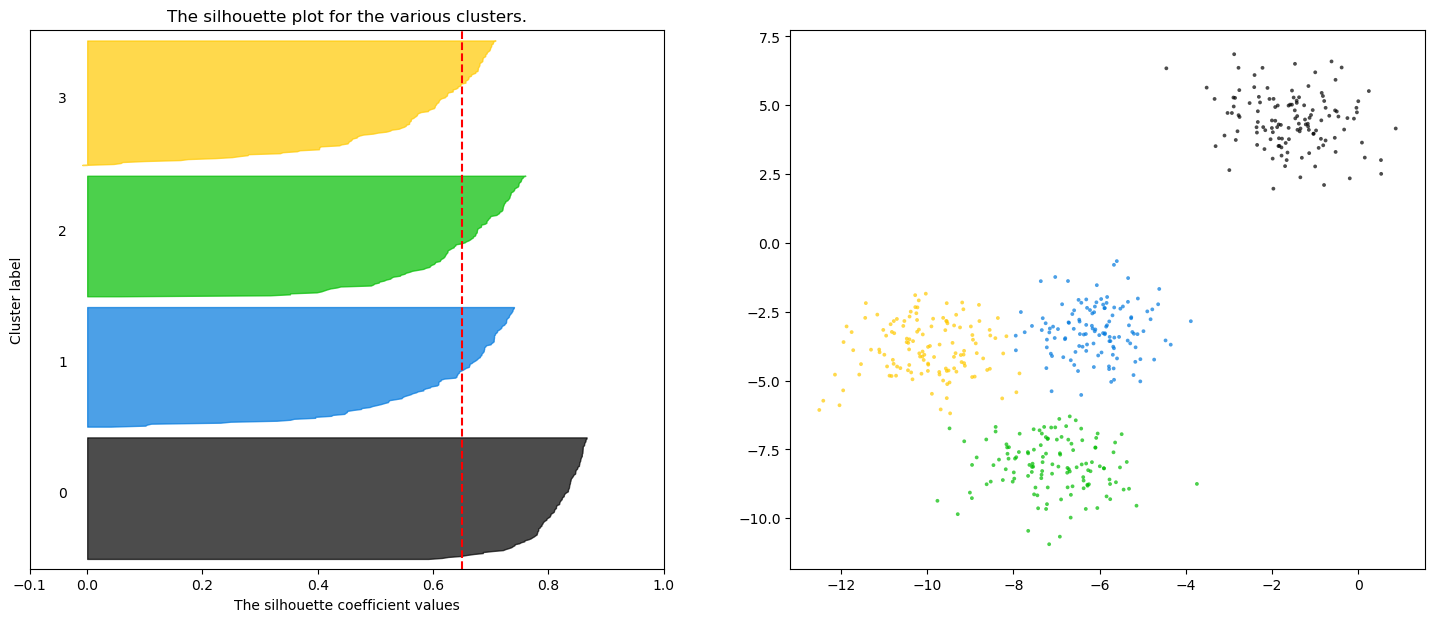

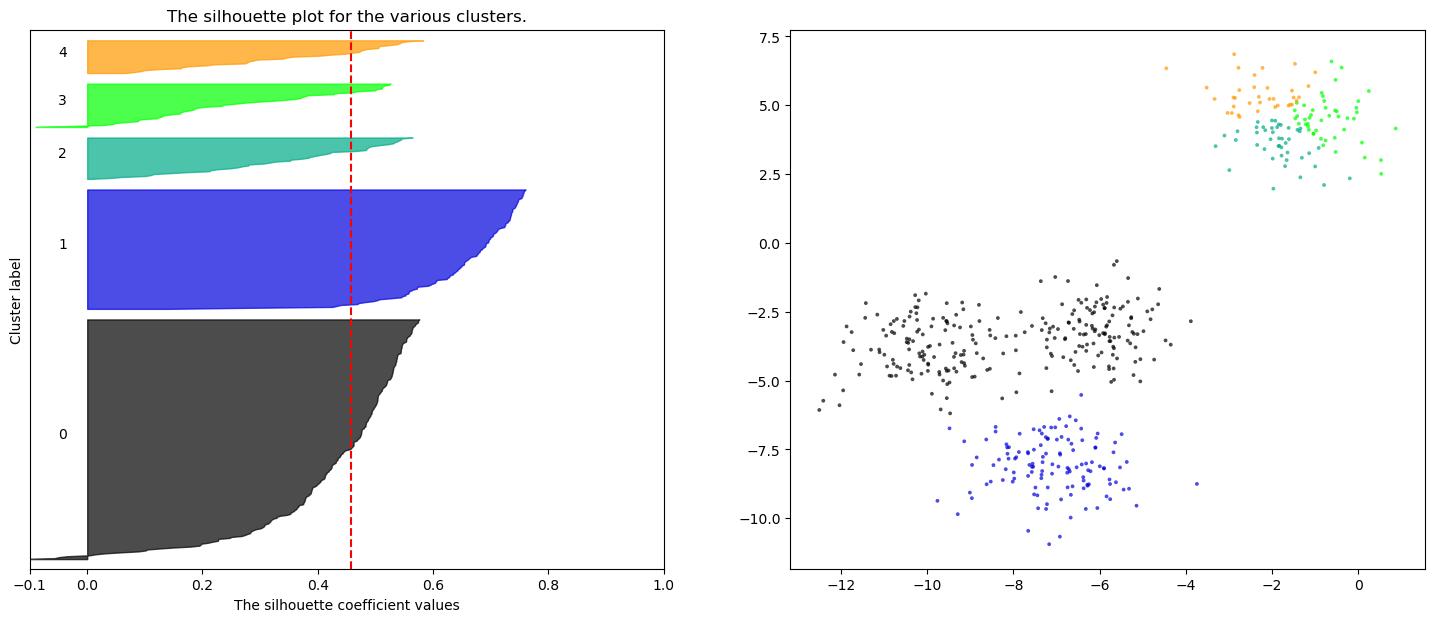

In [13]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score



range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmedoids = Kmedian1(n_clusters=n_clusters)
    clusterer = kmedoids.fit(X)
    cluster_labels = kmedoids.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


plt.show()


**d. What number of K got the best silhouette score? What can you say about the figures? Is this the
expected result?**

Although for two groups the silhouette coefficient is the highest with both methods 0.7049. When comparing the graphs we consider that k-medoids has a better performance in general for these data. With 4 groups a better clustering is obtained although the silhouette coefficient is a little lower 0.65.

#6. Use the following code snippet to create different types of scattered data:

In [14]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)


**a. Plot the different datasets in separate figures. What can you say about them?**


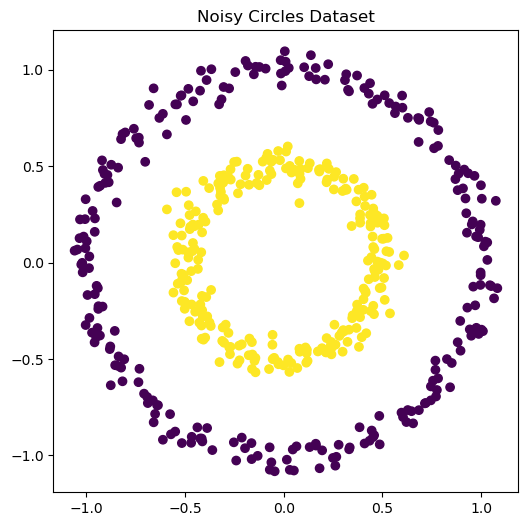

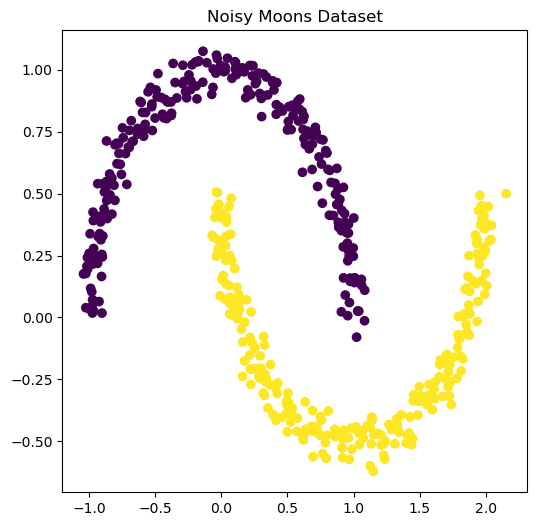

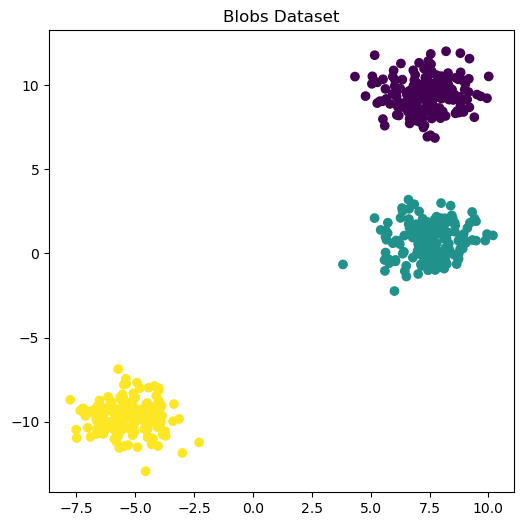

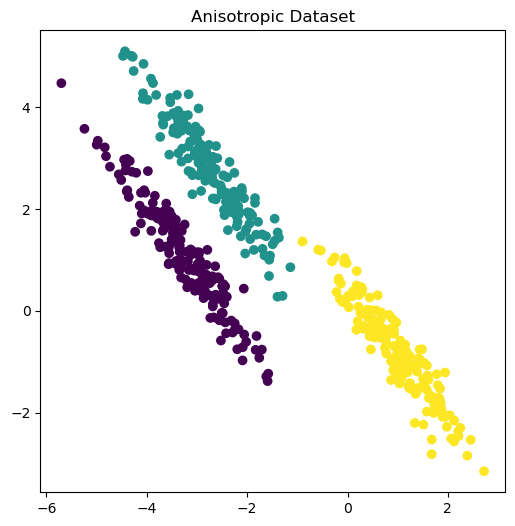

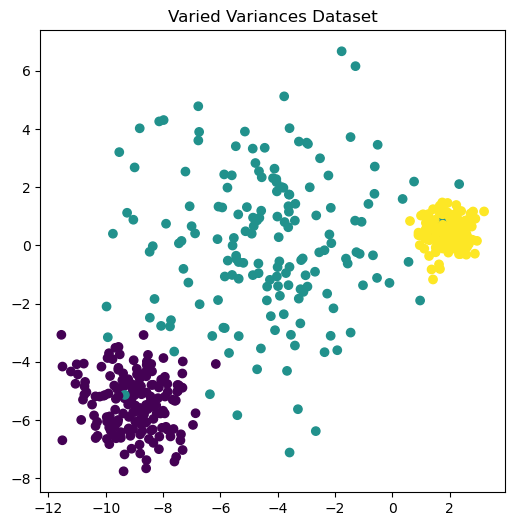

In [16]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500

# Generate and plot noisy circles dataset
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
plt.figure(figsize=(6, 6))
plt.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=noisy_circles[1], cmap='viridis')
plt.title('Noisy Circles Dataset')
plt.show()

# Generate and plot noisy moons dataset
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
plt.figure(figsize=(6, 6))
plt.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=noisy_moons[1], cmap='viridis')
plt.title('Noisy Moons Dataset')
plt.show()

# Generate and plot blobs dataset
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
plt.figure(figsize=(6, 6))
plt.scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1], cmap='viridis')
plt.title('Blobs Dataset')
plt.show()

# Generate and plot anisotropic dataset
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
plt.figure(figsize=(6, 6))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y, cmap='viridis')
plt.title('Anisotropic Dataset')
plt.show()

# Generate and plot varied variances dataset
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
plt.figure(figsize=(6, 6))
plt.scatter(varied[0][:, 0], varied[0][:, 1], c=varied[1], cmap='viridis')
plt.title('Varied Variances Dataset')
plt.show()


Diverse datasets are essential to test and compare different clustering techniques. Having diverse datasets allows you to determine which clustering algorithm works best for different types of data and situations.


**b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each
dataset and compare the results of each algorithm with respect to each datase**

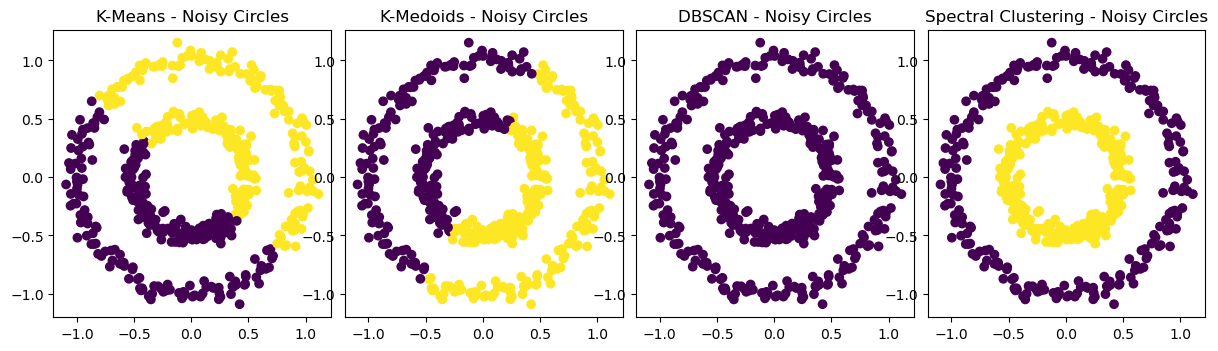

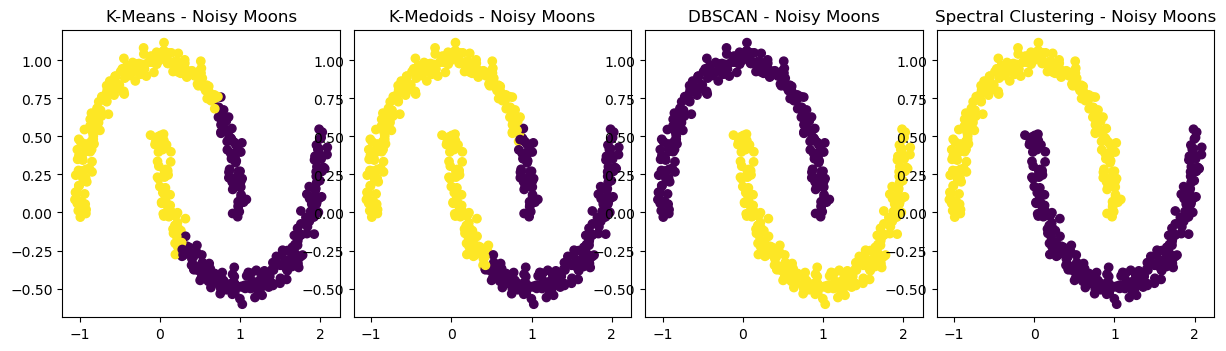

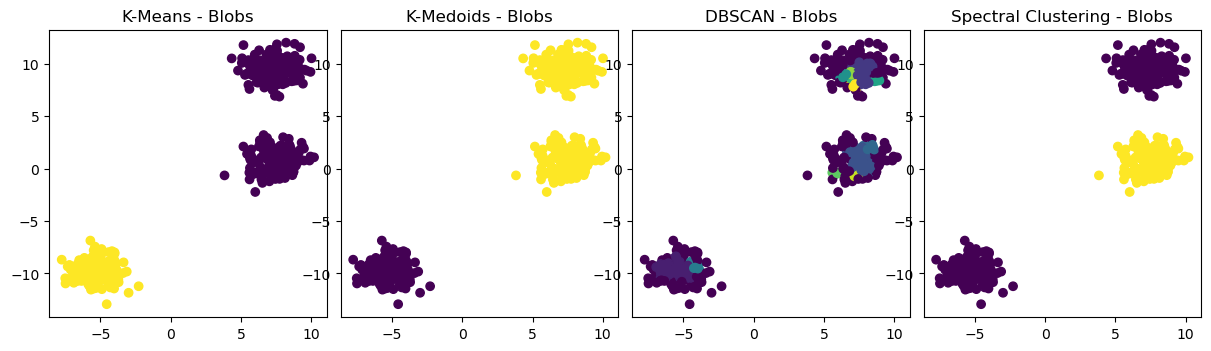

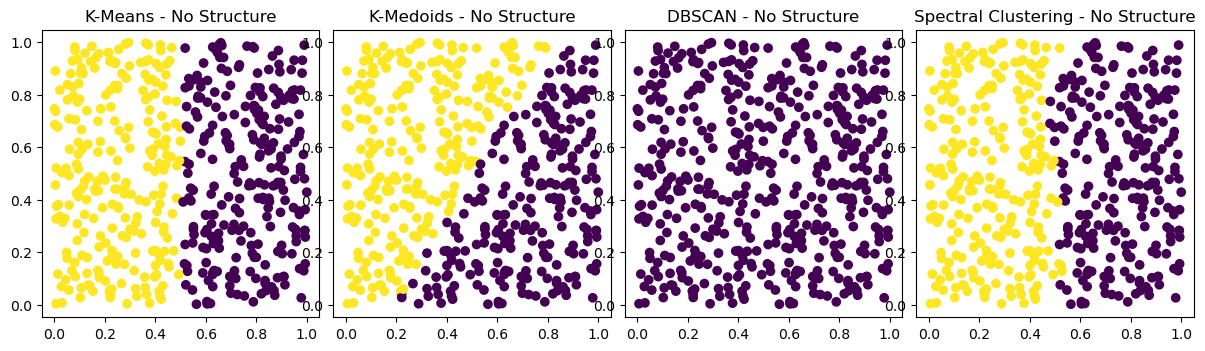

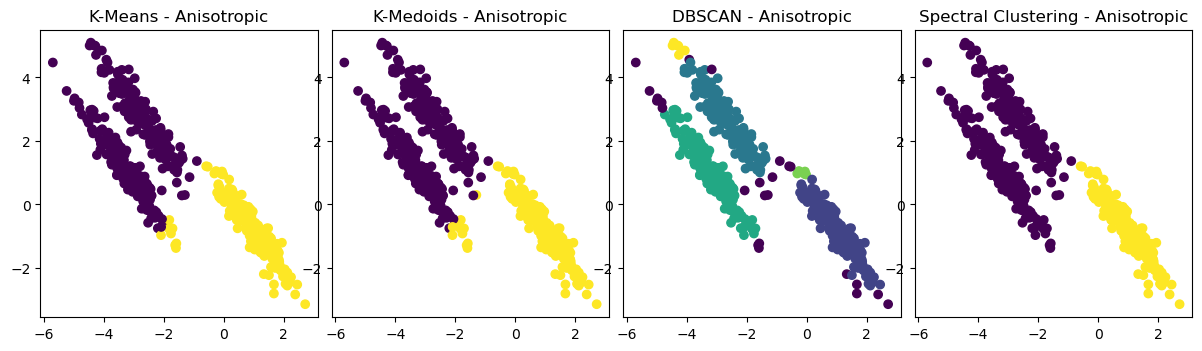

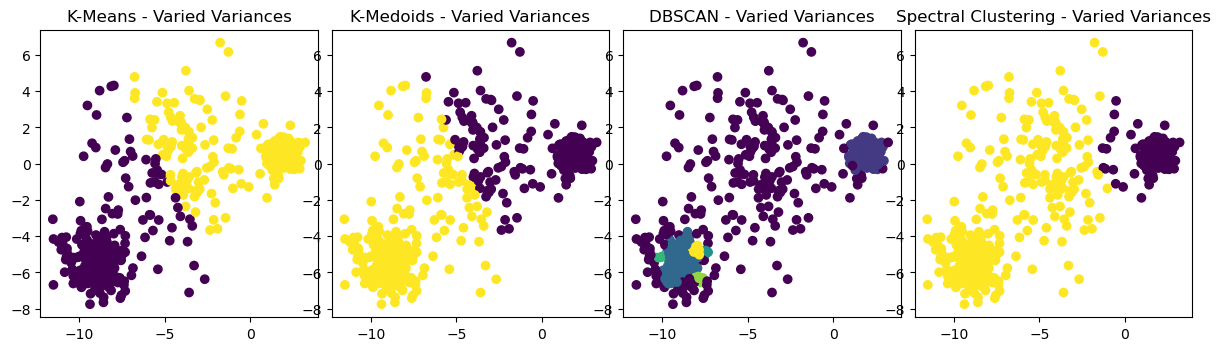

In [17]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn import datasets
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt

# Define functions to execute the algorithms and evaluate the results

def run_kmeans(X):
    kmeans = KMeans(n_clusters=2, random_state=0)
    labels = kmeans.fit_predict(X)
    return labels

def run_kmedoids(X):
    kmedoids = KMedoids(n_clusters=2, random_state=0)
    labels = kmedoids.fit_predict(X)
    return labels

def run_dbscan(X):
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    labels = dbscan.fit_predict(X)
    return labels

def run_spectral_clustering(X):
    spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
    labels = spectral.fit_predict(X)
    return labels

# Generate the datasets
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Execute and evaluate the algorithms on each dataset

datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
dataset_names = ['Noisy Circles', 'Noisy Moons', 'Blobs', 'No Structure', 'Anisotropic', 'Varied Variances']
algorithms = [run_kmeans, run_kmedoids, run_dbscan, run_spectral_clustering]
algorithm_names = ['K-Means', 'K-Medoids', 'DBSCAN', 'Spectral Clustering']

for i, dataset in enumerate(datasets):
    X, y = dataset
    plt.figure(figsize=(12, 3))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    for j, algorithm in enumerate(algorithms):
        labels = algorithm(X)
        plt.subplot(1, len(algorithms), j + 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        plt.title(f"{algorithm_names[j]} - {dataset_names[i]}")

    plt.show()


## Conclusions

When analyzing different types of data, it is important to have multiple clustering tools that not only allow for proper separation but also come with reasonable computational costs.

For the proposed data, both **k-means** and **k-medoids** achieved good separation for the "blops" dataset and for "non-structure." However, when choosing between these two methods, it would be more optimal to use k-means due to its lower computational requirement.

On the other hand, **DBSCAN** showed outstanding performance in the "Noisy Moons" dataset but performed poorly in the other evaluated datasets.

A dataset that could be considered highly challenging for a clustering process, such as "Noisy Circles," was satisfactorily solved only by **Spectral Clustering**. **Spectral Clustering** also performed exceptionally well in another complex method like "Noisy Moons." However, in this case, we also have **DBSCAN**. At this point, it is important to consider the time complexity of each of these methods, where **DBSCAN** is O(n^2) and **Spectral Clustering** is O(n^3). Therefore, at least for "Noisy Moons," the recommended method would be **DBSCAN**.

**DBSCAN** and **Spectral Clustering** have their own characteristics and are not directly comparable in terms of complexity to **K-Means** and **K-Medoids**. This is especially useful in a method like "Blobs" or "Non-Structure" where both showed outstanding results.